# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# 1 Подготовка данных

Откроем, прочитаем и исследуем наши данные, а также импортируем нужные библиотеки

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle

df = pd.read_csv('/datasets/Churn.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [2]:
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [3]:
df.duplicated().sum()

0

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Наблюдаем много пропусков в графе *Tenure* - количество недвижимости у клиента, скорее всего в данном случае NaN = 0 

Так что заменим все пропуски на нули

In [5]:
df = df.fillna(0)

In [6]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Удалим не нужны для исследования столбцы:

*RowNumber* - по сути повторяет индекс

*Surname* - фамилия не является признаком того останется клиент или нет

*CustomerId* - уникальные номер клиента, тоже никак не поможет нам понять останется он или покинет банк

In [8]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Заранее защитимся себя от дамми-ловушек и используем get_dummies

In [9]:
df_ohe = pd.get_dummies(df, drop_first=True)

df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
CreditScore          10000 non-null int64
Age                  10000 non-null int64
Tenure               10000 non-null float64
Balance              10000 non-null float64
NumOfProducts        10000 non-null int64
HasCrCard            10000 non-null int64
IsActiveMember       10000 non-null int64
EstimatedSalary      10000 non-null float64
Exited               10000 non-null int64
Geography_Germany    10000 non-null uint8
Geography_Spain      10000 non-null uint8
Gender_Male          10000 non-null uint8
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


###  Вывод: 

Мы открыли и подготовили данные: заполнили пропуски, удалили не нужные для исследований данные и провели метод прямого кодирования, защатившись от дамми-ловушек

Это даст не только более достоверные результаты в проекте, но так же может влиять на прошлы исследования
(если вдруг предыдущий аналитик использовал не до конца актуальные данные) 

# 2 Исследование задачи

Разобъем данные на 3 выборки - тестовую, обучающуую и валидную

In [10]:
features = df_ohe.drop('Exited', axis=1)
target = df_ohe['Exited']

features_train, features_test_valid, target_train, target_test_valid = train_test_split(features, target, test_size=0.4, random_state=12345) 

features_valid, features_test, target_valid, target_test = train_test_split(features_test_valid, target_test_valid, test_size=0.5, random_state=12345) 

Посмотрим на дисбаланс классов

In [11]:
target.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Переходим к изучению моделей, сначала без исправления дисбаланса.

Изучать будем:

    1) Решающее дерево
    
    2) Случайный лес
    
    3) Логистическую регрессию
   

### Модель решающего дерева

In [12]:
for depth in range(2, 25):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print('Глубина -', depth,'F1 метрика -', f1_score(target_valid, predicted_valid))

Глубина - 2 F1 метрика - 0.5217391304347825
Глубина - 3 F1 метрика - 0.4234875444839857
Глубина - 4 F1 метрика - 0.5528700906344411
Глубина - 5 F1 метрика - 0.5406249999999999
Глубина - 6 F1 метрика - 0.5696969696969697
Глубина - 7 F1 метрика - 0.5320813771517998
Глубина - 8 F1 метрика - 0.5449010654490106
Глубина - 9 F1 метрика - 0.5786516853932585
Глубина - 10 F1 метрика - 0.5297450424929179
Глубина - 11 F1 метрика - 0.5247657295850067
Глубина - 12 F1 метрика - 0.503916449086162
Глубина - 13 F1 метрика - 0.528497409326425
Глубина - 14 F1 метрика - 0.4864864864864865
Глубина - 15 F1 метрика - 0.5056603773584907
Глубина - 16 F1 метрика - 0.49370277078085645
Глубина - 17 F1 метрика - 0.47407407407407404
Глубина - 18 F1 метрика - 0.4926108374384236
Глубина - 19 F1 метрика - 0.4945454545454545
Глубина - 20 F1 метрика - 0.5054151624548736
Глубина - 21 F1 метрика - 0.49821215733015495
Глубина - 22 F1 метрика - 0.4817518248175182
Глубина - 23 F1 метрика - 0.4817518248175182
Глубина - 24 F1 м

Лучшая глубина оказалась - **9**, с метрикой F1 примерно равной **0.578**

### Модель случайного леса 

In [13]:
for estimator in range(50, 300, 10):
    model =  RandomForestClassifier(random_state=12345, n_estimators=estimator)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print('N estimators', estimator,'F1', f1_score(target_valid, predicted_valid))

N estimators 50 F1 0.5812220566318926
N estimators 60 F1 0.5824665676077266
N estimators 70 F1 0.5866666666666667
N estimators 80 F1 0.5824665676077266
N estimators 90 F1 0.5798816568047338
N estimators 100 F1 0.5807407407407408
N estimators 110 F1 0.5802650957290133
N estimators 120 F1 0.5911764705882353
N estimators 130 F1 0.5798816568047338
N estimators 140 F1 0.5786350148367952
N estimators 150 F1 0.5845697329376854
N estimators 160 F1 0.5824665676077266
N estimators 170 F1 0.573134328358209
N estimators 180 F1 0.5761194029850746
N estimators 190 F1 0.5727002967359051
N estimators 200 F1 0.573134328358209
N estimators 210 F1 0.573134328358209
N estimators 220 F1 0.5761194029850746
N estimators 230 F1 0.5756676557863503
N estimators 240 F1 0.5748502994011976
N estimators 250 F1 0.5752608047690015
N estimators 260 F1 0.5769805680119582
N estimators 270 F1 0.5782414307004471
N estimators 280 F1 0.5799701046337816
N estimators 290 F1 0.5791044776119403


Лучшим estimators стал шаг 120, проведем там исследовинае с шагом равным единицы

In [14]:
for estimator in range(110, 130, 1):
    model =  RandomForestClassifier(random_state=12345, n_estimators=estimator)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print('N estimators', estimator,'F1', f1_score(target_valid, predicted_valid))

N estimators 110 F1 0.5802650957290133
N estimators 111 F1 0.5827232796486091
N estimators 112 F1 0.5814977973568282
N estimators 113 F1 0.5814977973568282
N estimators 114 F1 0.5823529411764706
N estimators 115 F1 0.5844346549192364
N estimators 116 F1 0.5811209439528023
N estimators 117 F1 0.5873715124816447
N estimators 118 F1 0.5857988165680473
N estimators 119 F1 0.5903083700440529
N estimators 120 F1 0.5911764705882353
N estimators 121 F1 0.588579795021962
N estimators 122 F1 0.584070796460177
N estimators 123 F1 0.5861561119293078
N estimators 124 F1 0.5857988165680473
N estimators 125 F1 0.5870206489675516
N estimators 126 F1 0.58493353028065
N estimators 127 F1 0.584070796460177
N estimators 128 F1 0.5798816568047338
N estimators 129 F1 0.5790251107828656


Лучшим estimators и стал 120 с F1 метрикой равной 0.591

### Модель Логистической Регрессии

In [15]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F1', f1_score(target_valid, predicted_valid))

F1 0.08385744234800838


Явно не наш вариант :(

Скорее всего точность и полнота близзки к нулю

### Выведем общие показатели accuracy, полноты, точности и F1 по всем моделям

In [16]:
model = DecisionTreeClassifier(random_state=12345, max_depth=9)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Решающее дерево')
print('Accuracy -', accuracy_score(target_valid, predicted_valid))
print('Точность', precision_score(target_valid, predicted_valid))
print('Полнота', recall_score(target_valid, predicted_valid))
print('F1 метрика', f1_score(target_valid, predicted_valid))

Решающее дерево
Accuracy - 0.85
Точность 0.7006802721088435
Полнота 0.49282296650717705
F1 метрика 0.5786516853932585


In [17]:
model =  RandomForestClassifier(random_state=12345, n_estimators=120)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Accuracy -', accuracy_score(target_valid, predicted_valid))
print('Точность', precision_score(target_valid, predicted_valid))
print('Полнота', recall_score(target_valid, predicted_valid))
print('F1 метрика', f1_score(target_valid, predicted_valid))

Случайный лес
Accuracy - 0.861
Точность 0.767175572519084
Полнота 0.48086124401913877
F1 метрика 0.5911764705882353


In [18]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Accuracy -', accuracy_score(target_valid, predicted_valid))
print('Точность', precision_score(target_valid, predicted_valid))
print('Полнота', recall_score(target_valid, predicted_valid))
print('F1 метрика', f1_score(target_valid, predicted_valid))

Случайный лес
Accuracy - 0.7815
Точность 0.3389830508474576
Полнота 0.04784688995215311
F1 метрика 0.08385744234800838


### Построим кривые AUC и ROC для каждоый модели

AUC-ROC DecisionTreeClassifier 0.7899719632952051
AUC-ROC RandomForestClassifier 0.8416289113773976
AUC-ROC LogisticRegression 0.6727584246214894


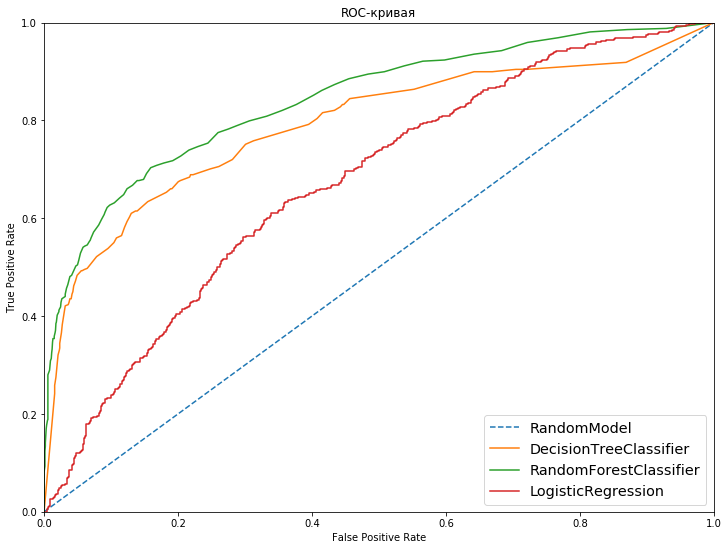

In [19]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')

model = DecisionTreeClassifier(random_state=12345, max_depth=9)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier',auc_roc)
plt.plot(fpr, tpr, label='DecisionTreeClassifier')

model = RandomForestClassifier(random_state=12345, n_estimators=120)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression',auc_roc)
plt.plot(fpr, tpr, label='LogisticRegression')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

### Вывод

Лучшим вариантом по f1 метрике является - *Случайный лес*

Присутствует дисбаланс 1:4, он может влиять на качество модели 

# 3 Борьба с дисбалансом

Проведем обучение моделей но, с балансировкой классов через гипперпараметр *class_weight*

In [20]:
model = DecisionTreeClassifier(random_state=12345, max_depth=9, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Решающее дерево')
print('Accuracy', accuracy_score(target_valid, predicted_valid))
print('Точность', precision_score(target_valid, predicted_valid))
print('Полнота', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = RandomForestClassifier(random_state=12345, n_estimators=120, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Accuracy', accuracy_score(target_valid, predicted_valid))
print('Точность', precision_score(target_valid, predicted_valid))
print('Полнота', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия')
print('Accuracy', accuracy_score(target_valid, predicted_valid))
print('Точность', precision_score(target_valid, predicted_valid))
print('Полнота', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))

Решающее дерево
Accuracy 0.761
Точность 0.45
Полнота 0.645933014354067
F1 0.5304518664047152

Случайный лес
Accuracy 0.8575
Точность 0.7878787878787878
Полнота 0.4354066985645933
F1 0.5608628659476117

Логистическая регрессия
Accuracy 0.693
Точность 0.37468030690537085
Полнота 0.7009569377990431
F1 0.48833333333333334


F1 Мера выросла у Логистической регрессии, но упала жо не подходящих нам параметров у дерева и леса!

Попробем методы upsampling и downsampling

In [21]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [22]:
model = DecisionTreeClassifier(random_state=12345, max_depth=9,)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print("Решающее дерево F1:", f1_score(target_valid, predicted_valid))

model = RandomForestClassifier(random_state=12345, n_estimators=120)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print("Случайный лес F1:", f1_score(target_valid, predicted_valid))

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print("Логистическая регрессия F1:", f1_score(target_valid, predicted_valid))

Решающее дерево F1: 0.5360443622920518
Случайный лес F1: 0.5784499054820416
Логистическая регрессия F1: 0.45337620578778143


Решающее дерево и Случайный лес показывают себя хуже, однако логистическая регрессия сильн овыросла! 

In [23]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [24]:
model = DecisionTreeClassifier(random_state=12345, max_depth=9,)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print("Решающее дерево F1:", f1_score(target_valid, predicted_valid))

model = RandomForestClassifier(random_state=12345, n_estimators=120)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print("Случайный лес F1:", f1_score(target_valid, predicted_valid))

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print("Логистическая регрессия F1:", f1_score(target_valid, predicted_valid))

Решающее дерево F1: 0.5304518664047152
Случайный лес F1: 0.5994694960212201
Логистическая регрессия F1: 0.45286059629331177


В этом случае наблюдаем небольшое увеличение у Случайного Леса (почти 0.6!), так же выросла у Линейной Регрессии, а вот у решающего дерева не изменилась

По сравнению с дисбалансными данными лучшего всего себя показал Случайны лес при тезнике upsampling - 0.599



### Проверим auc roc на новой выборке

AUC-ROC DecisionTreeClassifier 0.7601818302796411
AUC-ROC RandomForestClassifier 0.8382316914571223
AUC-ROC LogisticRegression 0.719318408652363


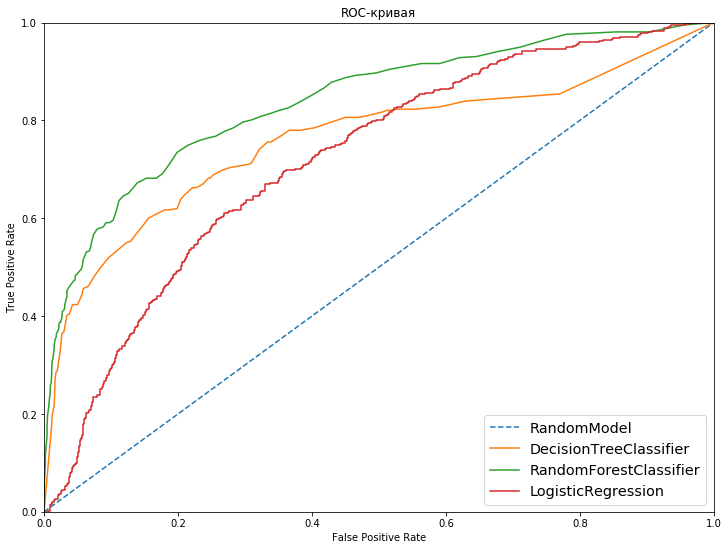

In [25]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')

model = DecisionTreeClassifier(random_state=12345, max_depth=9)
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier',auc_roc)
plt.plot(fpr, tpr, label='DecisionTreeClassifier')

model = RandomForestClassifier(random_state=12345, n_estimators=120)
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression',auc_roc)
plt.plot(fpr, tpr, label='LogisticRegression')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

Убрав дисбалас мы повысили качество моделей (подняли f1 метрику), лучшей техникой оказалось увеличение классов - upsampling, а лучшей моделью Случайный лес


# 4 Тестирование модели

Итак, лучшей моделью оказался Случайный лес, с ним и будем работать!

Проведем исследование гипперпараметров и найдем лучшую F1

Проверяем estimators 

In [26]:
for estimator in range(100, 500, 10):
    model =  RandomForestClassifier(random_state=12345, n_estimators=estimator)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    print('N estimators', estimator,'F1', f1_score(target_valid, predicted_valid))

N estimators 100 F1 0.5973333333333333
N estimators 110 F1 0.5992010652463382
N estimators 120 F1 0.5994694960212201
N estimators 130 F1 0.6084656084656085
N estimators 140 F1 0.6066225165562914
N estimators 150 F1 0.6050198150594451
N estimators 160 F1 0.6076618229854689
N estimators 170 F1 0.6050198150594451
N estimators 180 F1 0.6105263157894737
N estimators 190 F1 0.6050198150594451
N estimators 200 F1 0.6042216358839051
N estimators 210 F1 0.6055776892430279
N estimators 220 F1 0.6039735099337747
N estimators 230 F1 0.600265604249668
N estimators 240 F1 0.6039735099337747
N estimators 250 F1 0.5957446808510638
N estimators 260 F1 0.6023778071334214
N estimators 270 F1 0.6013245033112583
N estimators 280 F1 0.600265604249668
N estimators 290 F1 0.6005291005291005
N estimators 300 F1 0.5986754966887416
N estimators 310 F1 0.5986754966887416
N estimators 320 F1 0.600265604249668
N estimators 330 F1 0.600265604249668
N estimators 340 F1 0.6039735099337747
N estimators 350 F1 0.6013245

Лучший estimators находится в диапазоне от 170 до 190 - 0.610, проверим подробнее

In [27]:
for estimator in range(170, 190, 1):
    model =  RandomForestClassifier(random_state=12345, n_estimators=estimator)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    print('N estimators', estimator,'F1', f1_score(target_valid, predicted_valid))

N estimators 170 F1 0.6050198150594451
N estimators 171 F1 0.6089238845144357
N estimators 172 F1 0.6060606060606061
N estimators 173 F1 0.6073298429319371
N estimators 174 F1 0.6042216358839051
N estimators 175 F1 0.6062992125984252
N estimators 176 F1 0.6086956521739131
N estimators 177 F1 0.6089238845144357
N estimators 178 F1 0.6086956521739131
N estimators 179 F1 0.611764705882353
N estimators 180 F1 0.6105263157894737
N estimators 181 F1 0.6115485564304461
N estimators 182 F1 0.6084656084656085
N estimators 183 F1 0.6107470511140235
N estimators 184 F1 0.6060606060606061
N estimators 185 F1 0.6097240473061761
N estimators 186 F1 0.6094986807387863
N estimators 187 F1 0.6115485564304461
N estimators 188 F1 0.6068601583113458
N estimators 189 F1 0.6060606060606061


Лучшим estimator становится 179, f1 = 0.6117 

Выясним лучшую глубину

In [28]:
for depth in range(2, 30, 1):
    model =  RandomForestClassifier(random_state=12345, n_estimators=179, max_depth=depth)
    model.fit(features_upsampled, target_upsampled)
    predicted_test = model.predict(features_test)
    print('Глубина', depth,'F1', f1_score(target_test, predicted_test))

Глубина 2 F1 0.5498602050326189
Глубина 3 F1 0.5692307692307692
Глубина 4 F1 0.5836501901140684
Глубина 5 F1 0.5984703632887189
Глубина 6 F1 0.5968688845401174
Глубина 7 F1 0.6057596822244291
Глубина 8 F1 0.6150753768844223
Глубина 9 F1 0.6107660455486542
Глубина 10 F1 0.611231101511879
Глубина 11 F1 0.6036036036036037
Глубина 12 F1 0.6055684454756382
Глубина 13 F1 0.6053268765133171
Глубина 14 F1 0.598014888337469
Глубина 15 F1 0.6048284625158832
Глубина 16 F1 0.6033376123234917
Глубина 17 F1 0.5958549222797928
Глубина 18 F1 0.5911458333333333
Глубина 19 F1 0.592885375494071
Глубина 20 F1 0.6007905138339921
Глубина 21 F1 0.5873015873015872
Глубина 22 F1 0.5900783289817232
Глубина 23 F1 0.58311345646438
Глубина 24 F1 0.5933774834437087
Глубина 25 F1 0.5849802371541502
Глубина 26 F1 0.583442838370565
Глубина 27 F1 0.5853018372703412
Глубина 28 F1 0.5860709592641262
Глубина 29 F1 0.5860709592641262


Лучшая глубина - 13 с f1 = 0.624

In [29]:
model =  RandomForestClassifier(random_state=12345, n_estimators=179, max_depth=13)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
print(f1_score(target_test, predicted_test))

0.6053268765133171


Проверим нашу финальную модель на адекватность

AUC-ROC RandomForestClassifier 0.8558534248977994


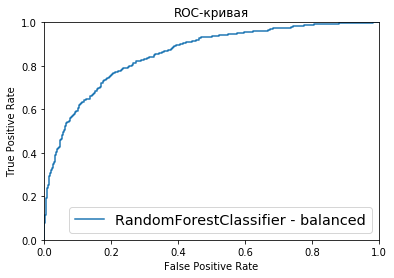

In [30]:
model =  RandomForestClassifier(random_state=12345, n_estimators=179, max_depth=13)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC RandomForestClassifier',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier - balanced')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

# Вывод

Итак мы подготовили оптимальную модель для банка - случайный лес и F1 достиг нужного значения с техникой борьбы с дисбалансом - upsampling

auc-roc больше 0.83 - модель адекватна

по мимо этого мы:

1) предобработали данные

2) исследовали разные модели

3) провели работу с дисбалансом

4) провели тестирование с использванием трех методов

5) проверили модель на адекватность

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*